In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.8333333333333334


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.9385964912280702


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train, y_train)
print(sgd.score(x_val, y_val))


0.6923076923076923


In [6]:
x=[2,10,4,22,16]
y=[0,0,0,1,0]
print(x)

print(y)

[2, 10, 4, 22, 16]
[0, 0, 0, 1, 0]


['mean perimeter' 'mean area']


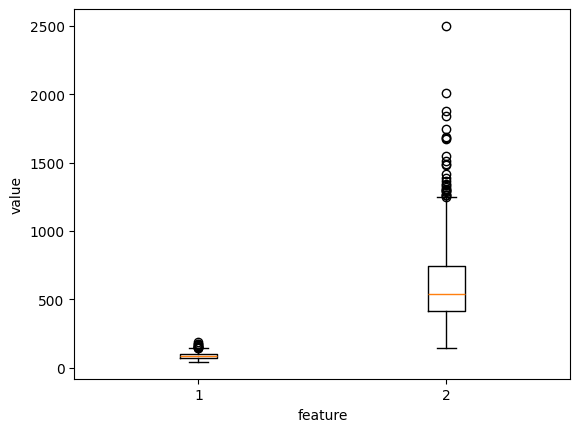

In [7]:
import matplotlib.pyplot as plt
print(cancer.feature_names[[2,3]])

plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()


In [8]:
import numpy as np
import pandas as pd

In [9]:
class SingleLayer:
  def __init__(self, learning_rate=0.1):
      self.w = None
      self.b = None
      self.losses = []
      self.w_history = []
      self.lr = learning_rate

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad

  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가

  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    if isinstance(x, (pd.DataFrame, pd.Series)):
        x = x.values
    if isinstance(y, (pd.DataFrame, pd.Series)):
        y = y.values
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0
# 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
# 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용

  def predict(self, x):
      z = [self.forpass(x_i) for x_i in x]
      return np.array(z) > 0

  def score(self, x, y):
      return np.mean(self.predict(x) == y)

layer = SingleLayer()
layer.fit(x_train, y_train)
print(layer.score(x_test, y_test))

# 훈련 데이터의 정확도 출력
print(layer.score(x_train, y_train))

<ipython-input-9-9593a78c5fea>:22: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.8947368421052632
0.8489010989010989


In [10]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))

<ipython-input-9-9593a78c5fea>:22: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.9230769230769231


IndexError: list index out of range

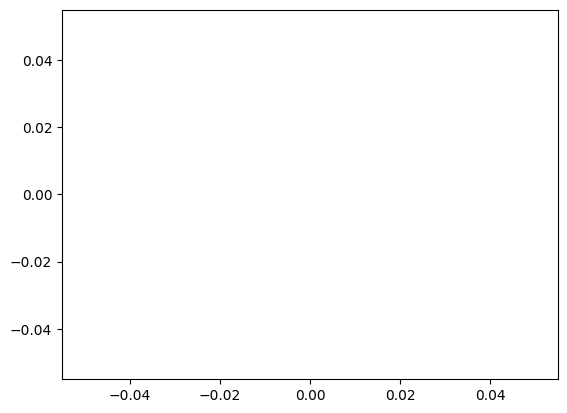

In [11]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro') # 'ro ' r은 red, o는 marker의 모양, 예를 들어 ‘w^‚는 흰색 삼각형
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

IndexError: list index out of range

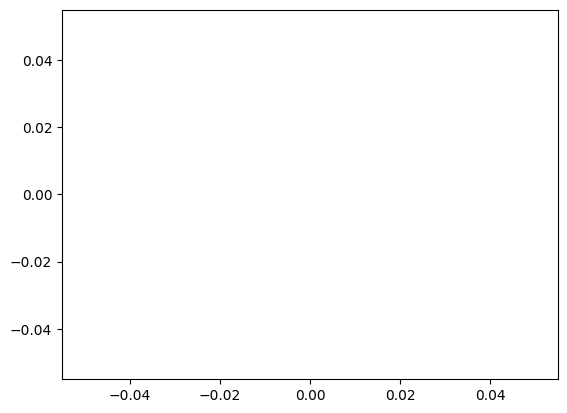

In [ ]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
print(layer2.score(x_val, y_val))

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
print(layer2.score(x_val_scaled, y_val))


0.37362637362637363
0.967032967032967


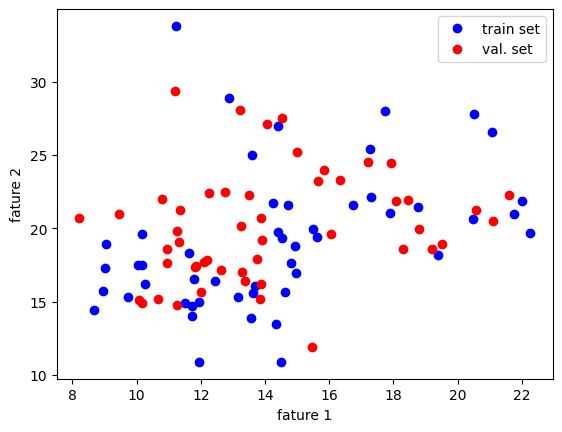

In [ ]:
# 1. Training data와 validation data로 산점도 그리기
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()


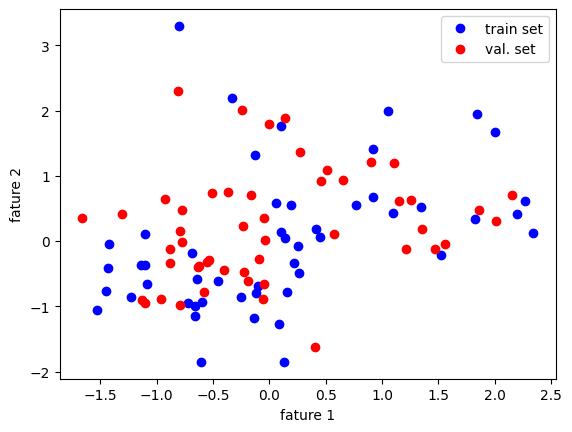

In [ ]:
# 2. 전처리된 Training data와 validation data로 산점도 그리기
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()


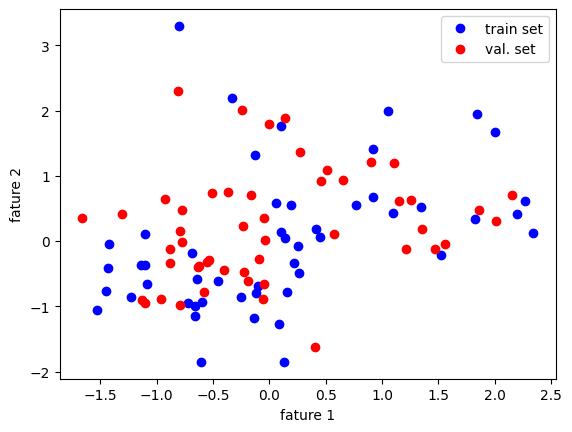

In [ ]:
# 3. 올바른 validation data 전처리 (표준화) : Validation data의 표준화도 training data의 평균과 표준편차를 이용해야 함
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [ ]:
print(layer2.score(x_val_scaled, y_val))


0.967032967032967
